
Together No Ref DE

=== Together No Ref DE Summary ===
                                 count      mean       std  min  25%  50%  \
hallucination_score               33.0  3.878788  0.696311  0.0  4.0  4.0   
answer_accuracy_score             33.0  3.454545  0.904534  0.0  3.0  4.0   
user_satisfaction_score           33.0  3.393939  0.899284  0.0  3.0  4.0   
coherence_clarity_fluency_score   33.0  3.969697  0.174078  3.0  4.0  4.0   
context_quality_score             33.0  3.878788  0.331434  3.0  4.0  4.0   
overall_score                     33.0  3.715152  0.540903  1.2  3.6  4.0   

                                 75%  max  
hallucination_score              4.0  4.0  
answer_accuracy_score            4.0  4.0  
user_satisfaction_score          4.0  4.0  
coherence_clarity_fluency_score  4.0  4.0  
context_quality_score            4.0  4.0  
overall_score                    4.0  4.0  

Together No Ref EN

=== Together No Ref EN Summary ===
                                 count  

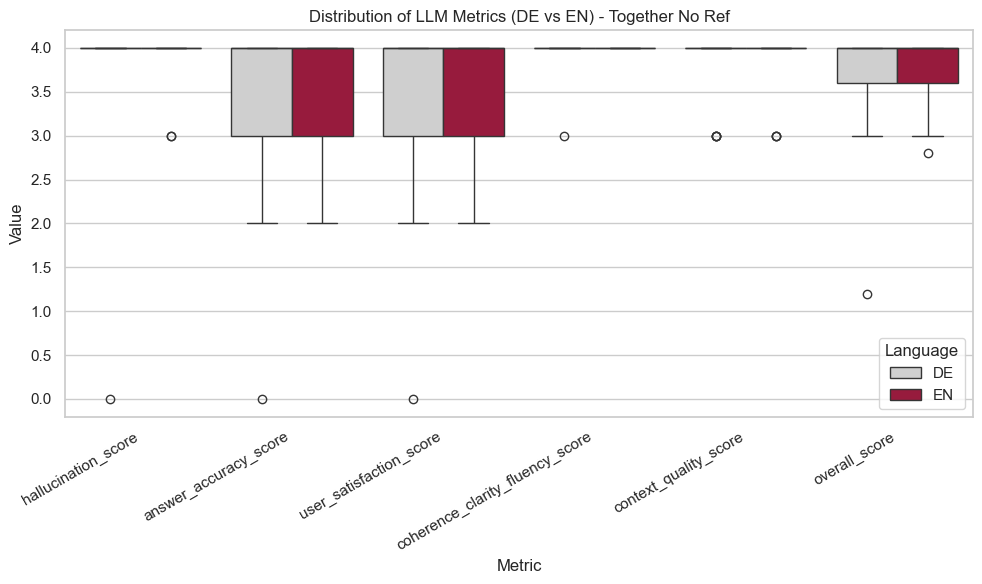

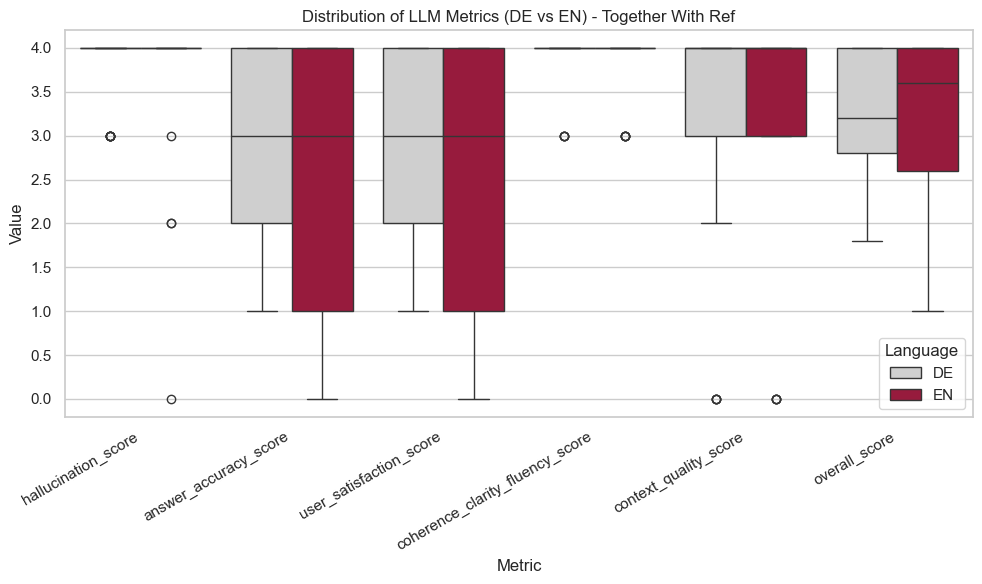

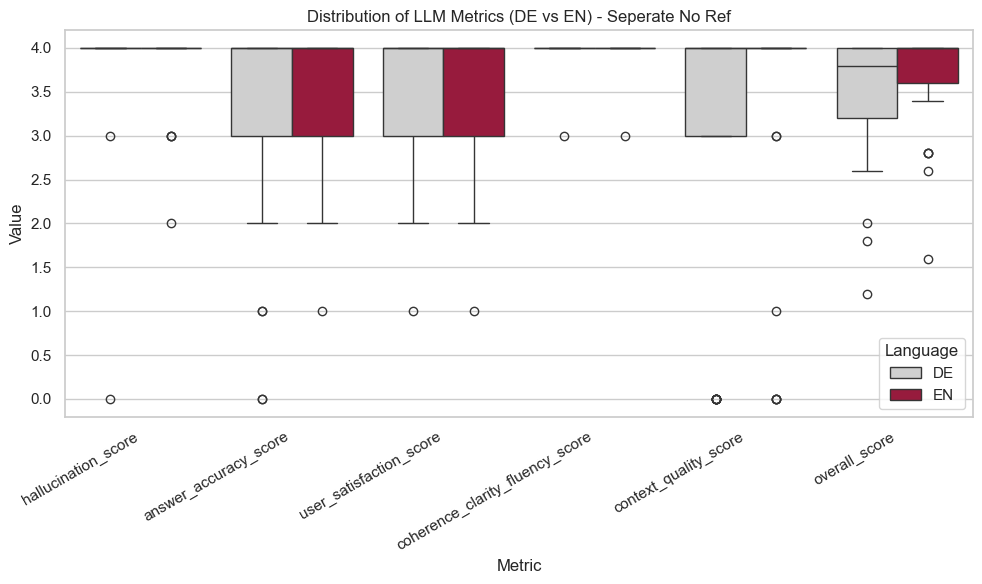

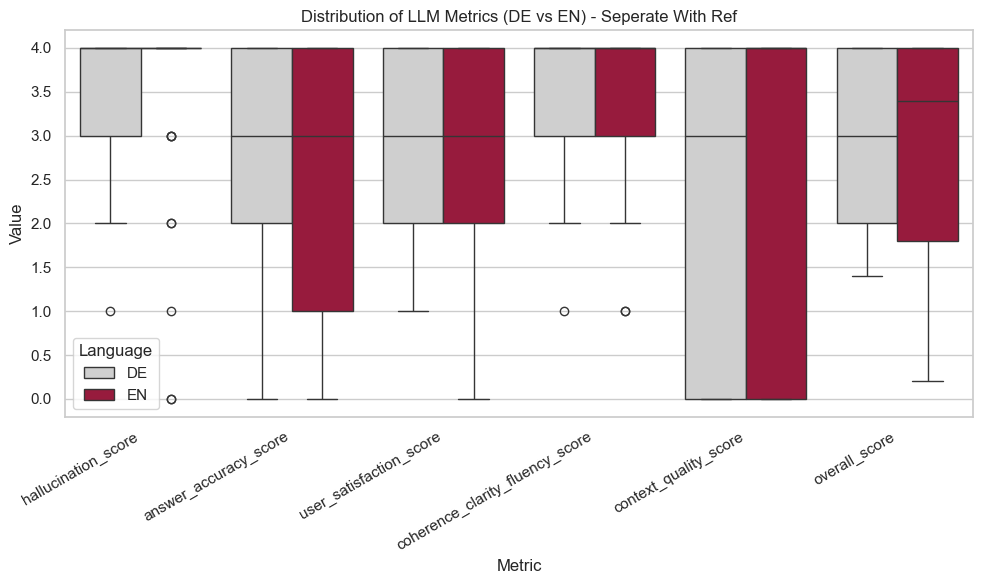

In [7]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ----------------------------------------------------------------------------
# 1) LOAD AND AGGREGATE LLM as Judge
# ----------------------------------------------------------------------------

# Paths to BERTScore/BARTScore/BLEURT CSVs (adjust to your file locations)
together_no_ref_de_path = "../../../data/eval/llm_judge_together_no_ref_de.csv"
together_no_ref_en_path = "../../../data/eval/llm_judge_together_no_ref_en.csv"
together_with_ref_de_path = "../../../data/eval/llm_judge_together_with_ref_de.csv"
together_with_ref_en_path = "../../../data/eval/llm_judge_together_with_ref_en.csv"
seperate_no_ref_de_path = "../../../data/eval/llm_judge_seperate_no_ref_de.csv"
seperate_no_ref_en_path = "../../../data/eval/llm_judge_seperate_no_ref_en.csv"
seperate_with_ref_de_path = "../../../data/eval/llm_judge_seperate_with_ref_de.csv"
seperate_with_ref_en_path = "../../../data/eval/llm_judge_seperate_with_ref_en.csv"


# Read the CSVs
together_no_ref_de = pd.read_csv(together_no_ref_de_path)
together_no_ref_en = pd.read_csv(together_no_ref_en_path)
together_with_ref_de = pd.read_csv(together_with_ref_de_path)
together_with_ref_en = pd.read_csv(together_with_ref_en_path)
seperate_no_ref_de = pd.read_csv(seperate_no_ref_de_path)
seperate_no_ref_en = pd.read_csv(seperate_no_ref_en_path)
seperate_with_ref_de = pd.read_csv(seperate_with_ref_de_path)
seperate_with_ref_en = pd.read_csv(seperate_with_ref_en_path)
# Columns of interest
llm_col = [
    "hallucination_score",
    "answer_accuracy_score",
    "user_satisfaction_score",
    "coherence_clarity_fluency_score",
    "context_quality_score",
    "overall_score"
]


# --- Compute summary stats for BERTScore (German vs English) ---
def summarize_metrics(df, metric_cols, lang_label):
    summary_df = df[metric_cols].describe().transpose()  # mean, std, min, max, etc.
    print(f"\n=== {lang_label} Summary ===")
    print(summary_df)
    return summary_df

print("\nTogether No Ref DE")
together_no_ref_de_summary = summarize_metrics(together_no_ref_de, llm_col, lang_label="Together No Ref DE")

print("\nTogether No Ref EN")
together_no_ref_en_summary = summarize_metrics(together_no_ref_en, llm_col, lang_label="Together No Ref EN")

print("\nTogether With Ref DE")
together_with_ref_de_summary = summarize_metrics(together_with_ref_de, llm_col, lang_label="Together With Ref DE")

print("\nTogether With Ref EN")
together_with_ref_en_summary = summarize_metrics(together_with_ref_en, llm_col, lang_label="Together With Ref EN")

print("\nSeperate No Ref DE")
seperate_no_ref_de_summary = summarize_metrics(seperate_no_ref_de, llm_col, lang_label="Seperate No Ref DE")

print("\nSeperate No Ref EN")
seperate_no_ref_en_summary = summarize_metrics(seperate_no_ref_en, llm_col, lang_label="Seperate No Ref EN")

print("\nSeperate With Ref DE")
seperate_with_ref_de_summary = summarize_metrics(seperate_with_ref_de, llm_col, lang_label="Seperate With Ref DE")

print("\nSeperate With Ref EN")
seperate_with_ref_en_summary = summarize_metrics(seperate_with_ref_en, llm_col, lang_label="Seperate With Ref EN")

# ----------------------------------------------------------------------------
# 2) OPTIONAL: DISTRIBUTION PLOTS (EXAMPLE: BOX PLOTS)
# ----------------------------------------------------------------------------

sns.set_theme(style="whitegrid")
palette = {'DE': '#cfcfcf', 'EN': '#ac0634'}


# Merge the data into a single DF for easy plotting: 
# We'll add a 'Language' column and a 'Metric' column
together_no_ref_de_long = together_no_ref_de.melt(
    id_vars=["question_id_q"],
    value_vars=llm_col,
    var_name="Metric",
    value_name="Value"
)
together_no_ref_de_long["Language"] = "DE"

together_no_ref_en_long = together_no_ref_en.melt(
    id_vars=["question_id_q"],
    value_vars=llm_col,
    var_name="Metric",
    value_name="Value"
)
together_no_ref_en_long["Language"] = "EN"

together_no_ref_concat = pd.concat([together_no_ref_de_long, together_no_ref_en_long], ignore_index=True)

together_with_ref_de_long = together_with_ref_de.melt(
    id_vars=["question_id_q"],
    value_vars=llm_col,
    var_name="Metric",
    value_name="Value"
)
together_with_ref_de_long["Language"] = "DE"

together_with_ref_en_long = together_with_ref_en.melt(
    id_vars=["question_id_q"],
    value_vars=llm_col,
    var_name="Metric",
    value_name="Value"
)
together_with_ref_en_long["Language"] = "EN"

together_with_ref_concat = pd.concat([together_with_ref_de_long, together_with_ref_en_long], ignore_index=True)

seperate_no_ref_de_long = seperate_no_ref_de.melt(
    id_vars=["question_id_q"],
    value_vars=llm_col,
    var_name="Metric",
    value_name="Value"
)
seperate_no_ref_de_long["Language"] = "DE"

seperate_no_ref_en_long = seperate_no_ref_en.melt(
    id_vars=["question_id_q"],
    value_vars=llm_col,
    var_name="Metric",
    value_name="Value"
)
seperate_no_ref_en_long["Language"] = "EN"

seperate_no_ref_concat = pd.concat([seperate_no_ref_de_long, seperate_no_ref_en_long], ignore_index=True)

seperate_with_ref_de_long = seperate_with_ref_de.melt(
    id_vars=["question_id_q"],
    value_vars=llm_col,
    var_name="Metric",
    value_name="Value"
)
seperate_with_ref_de_long["Language"] = "DE"

seperate_with_ref_en_long = seperate_with_ref_en.melt(
    id_vars=["question_id_q"],
    value_vars=llm_col,
    var_name="Metric",
    value_name="Value"
)
seperate_with_ref_en_long["Language"] = "EN"

seperate_with_ref_concat = pd.concat([seperate_with_ref_de_long, seperate_with_ref_en_long], ignore_index=True)

# Plot the distributions
for df, title in zip([together_no_ref_concat, together_with_ref_concat, seperate_no_ref_concat, seperate_with_ref_concat], 
                     ["Together No Ref", "Together With Ref", "Seperate No Ref", "Seperate With Ref"]):
    plt.figure(figsize=(10,6))
    sns.boxplot(data=df, x="Metric", y="Value", hue="Language", palette=palette)
    plt.title(f"Distribution of LLM Metrics (DE vs EN) - {title}")
    plt.xticks(rotation=30, ha="right")
    plt.tight_layout()
    plt.show()

C:\Users\wurch\AppData\Local\Temp\ipykernel_47472\1792518515.py:162: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.142' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annot_df.loc[idx, col] = significance_marker_and_bold(r_val, p_val)
C:\Users\wurch\AppData\Local\Temp\ipykernel_47472\1792518515.py:162: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.010' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annot_df.loc[idx, col] = significance_marker_and_bold(r_val, p_val)
C:\Users\wurch\AppData\Local\Temp\ipykernel_47472\1792518515.py:162: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.292' has dtype incompatible with float64, please explicitly cast to a c

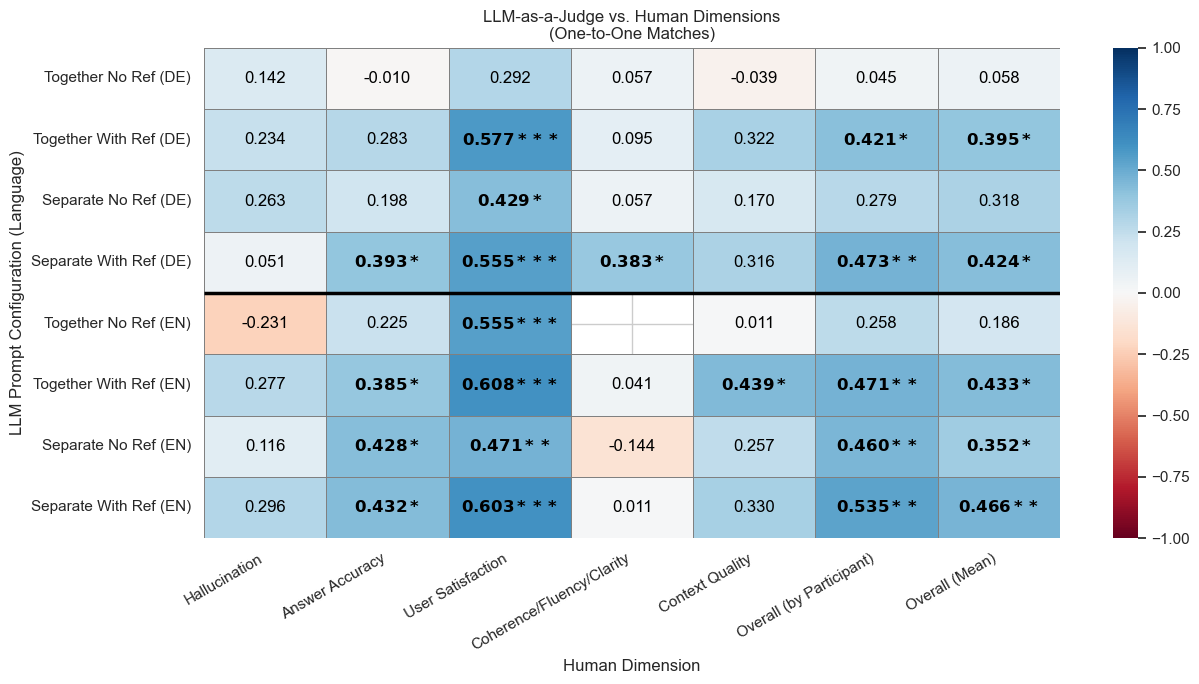

,Hallucination,Answer Accuracy,User Satisfaction,Coherence/Fluency/Clarity,Context Quality,Overall (by Participant),Overall (Mean)
together_no_ref_de,0.142,-0.010,0.292,0.057,-0.039,0.045,0.058
together_with_ref_de,0.234,0.283,$\bf{0.577***}$,0.095,0.322,$\bf{0.421*}$,$\bf{0.395*}$
seperate_no_ref_de,0.263,0.198,$\bf{0.429*}$,0.057,0.170,0.279,0.318
seperate_with_ref_de,0.051,$\bf{0.393*}$,$\bf{0.555***}$,$\bf{0.383*}$,0.316,$\bf{0.473**}$,$\bf{0.424*}$
together_no_ref_en,-0.231,0.225,$\bf{0.555***}$,,0.011,0.258,0.186
together_with_ref_en,0.277,$\bf{0.385*}$,$\bf{0.608***}$,0.041,$\bf{0.439*}$,$\bf{0.471**}$,$\bf{0.433*}$
seperate_no_ref_en,0.116,$\bf{0.428*}$,$\bf{0.471**}$,-0.144,0.257,$\bf{0.460**}$,$\bf{0.352*}$
seperate_with_ref_en,0.296,$\bf{0.432*}$,$\bf{0.603***}$,0.011,0.330,$\bf{0.535**}$,$\bf{0.466**}$


In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# ------------------------------------------------------------------
# 1) LOAD THE FILTERED CORRELATION CSV
#    This CSV should already contain rows where LLM-based metrics
#    (e.g. hallucination_score) are matched with corresponding human columns
#    (e.g. avg_hallucination). However, we also want to allow
#    LLM "overall_score" to correlate with both "avg_overall" AND "overall_mean."
# ------------------------------------------------------------------
corr_path = "../../../data/eval/correlation/correlation_splits_filtered_llm.csv"
df_corr = pd.read_csv(corr_path)

# ------------------------------------------------------------------
# 2) FILTER FOR LLM-AS-A-JUDGE FILES (IF NEEDED)
# ------------------------------------------------------------------
llm_files = [
    "llm_judge_together_no_ref_de.csv",
    "llm_judge_together_no_ref_en.csv",
    "llm_judge_together_with_ref_de.csv",
    "llm_judge_together_with_ref_en.csv",
    "llm_judge_seperate_no_ref_de.csv",
    "llm_judge_seperate_no_ref_en.csv",
    "llm_judge_seperate_with_ref_de.csv",
    "llm_judge_seperate_with_ref_en.csv",
]
df_llm = df_corr[df_corr["metric_file"].isin(llm_files)].copy()

# ------------------------------------------------------------------
# 3) DEFINE A MAPPING FROM LLM METRIC -> POSSIBLE HUMAN COLUMNS
#    Note that "overall_score" can match both "avg_overall" and "overall_mean."
# ------------------------------------------------------------------
llm_to_human_map = {
    "hallucination_score": ["avg_hallucination"],
    "answer_accuracy_score": ["avg_answer_acc"],
    "user_satisfaction_score": ["avg_user_sat"],
    "coherence_clarity_fluency_score": ["avg_coherence"],
    "context_quality_score": ["avg_context_qual"],
    # overall_score => can map to both avg_overall (per-annotator) AND overall_mean
    "overall_score": ["avg_overall", "overall_mean"],
}

# ------------------------------------------------------------------
# 4) HUMAN-READABLE COLUMN LABELS FOR THE HEATMAP (7 COLUMNS)
# ------------------------------------------------------------------
column_renames = {
    "avg_hallucination": "Hallucination",
    "avg_answer_acc": "Answer Accuracy",
    "avg_user_sat": "User Satisfaction",
    "avg_coherence": "Coherence/Fluency/Clarity",
    "avg_context_qual": "Context Quality",
    "avg_overall": "Overall (by Participant)",
    "overall_mean": "Overall (Mean)"
}

final_columns = [
    "Hallucination",
    "Answer Accuracy",
    "User Satisfaction",
    "Coherence/Fluency/Clarity",
    "Context Quality",
    "Overall (by Participant)",
    "Overall (Mean)"
]

# ------------------------------------------------------------------
# 5) EXTRACT PROMPT CONFIGURATIONS FOR ROW LABELS
#    e.g. "together_no_ref_de", "seperate_with_ref_en", etc.
# ------------------------------------------------------------------
df_llm["prompt_file_id"] = df_llm["metric_file"].str.replace(".csv", "", regex=False)
df_llm["prompt_file_id"] = df_llm["prompt_file_id"].str.replace("llm_judge_", "", regex=False)



row_labels = sorted(df_llm["prompt_file_id"].unique().tolist())

# Prepare an empty DataFrame with shape (#rows = 8, #columns = 7)
heatmap_df = pd.DataFrame(
    data=np.nan,
    index=row_labels,
    columns=final_columns
)
pval_df = pd.DataFrame(
    data=np.nan,
    index=row_labels,
    columns=final_columns
)

# ------------------------------------------------------------------
# 6) FILL THE DATAFRAME WITH CORRELATIONS WHERE THERE IS A
#    1-to-1 MATCH BETWEEN LLM METRIC & HUMAN COLUMN
#    (Now "overall_score" can fill 2 columns if the CSV has
#     correlations for both "avg_overall" and "overall_mean".)
# ------------------------------------------------------------------
for row in df_llm.itertuples(index=False):
    # row contains:
    #   row.metric_file, row.metric_column, row.human_column,
    #   row.spearman_corr, row.p_value, row.language,
    #   row.prompt_file_id, etc.
    if row.metric_column in llm_to_human_map:
        # e.g. "overall_score" -> ["avg_overall", "overall_mean"]
        possible_human_cols = llm_to_human_map[row.metric_column]
        # Check if the current row's human_column is one of them
        if row.human_column in possible_human_cols:
            # e.g. row.human_column = "avg_overall"
            # pick the final column name
            final_col_name = column_renames[row.human_column]
            row_name = row.prompt_file_id  # e.g. "together_no_ref_de"
            heatmap_df.loc[row_name, final_col_name] = row.spearman_corr
            pval_df.loc[row_name, final_col_name] = row.p_value

# ------------------------------------------------------------------
# 7) OPTIONAL: CUSTOM ORDER FOR THE ROWS
# ------------------------------------------------------------------
desired_order = [
    "together_no_ref_de",
    "together_with_ref_de",
    "seperate_no_ref_de",
    "seperate_with_ref_de",
    "together_no_ref_en",
    "together_with_ref_en",
    "seperate_no_ref_en",
    "seperate_with_ref_en",
]
heatmap_df = heatmap_df.reindex(index=desired_order)
pval_df    = pval_df.reindex(index=desired_order)

# ------------------------------------------------------------------
# 8) CREATE A SIGNIFICANCE-ANNOTATED DATAFRAME
# ------------------------------------------------------------------
def significance_marker_and_bold(r_val, p_val):
    """
    Returns a LaTeX-style string with bolding for p < 0.05 
    and appended stars based on p-value thresholds.
    """
    if pd.isna(r_val) or pd.isna(p_val):
        return ""
    if p_val < 0.001:
        stars = "***"
    elif p_val < 0.01:
        stars = "**"
    elif p_val < 0.05:
        stars = "*"
    else:
        stars = ""
    base_str = f"{r_val:.3f}{stars}"
    if p_val < 0.05:
        return f"$\\bf{{{base_str}}}$"
    else:
        return base_str

annot_df = heatmap_df.copy()
for idx in heatmap_df.index:
    for col in heatmap_df.columns:
        r_val = heatmap_df.loc[idx, col]
        p_val = pval_df.loc[idx, col]
        if pd.isna(r_val) or pd.isna(p_val):
            annot_df.loc[idx, col] = ""
        else:
            annot_df.loc[idx, col] = significance_marker_and_bold(r_val, p_val)

# ------------------------------------------------------------------
# 9) PLOT THE HEATMAP
# ------------------------------------------------------------------
sns.set_theme(style="whitegrid")
plt.figure(figsize=(13, 7))

corr_matrix = heatmap_df.astype(float)

ax = sns.heatmap(
    data=corr_matrix, 
    annot=annot_df,
    fmt="",
    cmap="RdBu",
    center=0,
    vmin=-1, vmax=1,
    linewidths=0.5,
    linecolor="gray",
    annot_kws={"color": "black"}
)
# Define new labels for the Y-axis (LLM Prompt Configurations)
y_axis_labels = [
    "Together No Ref (DE)",
    "Together With Ref (DE)",
    "Separate No Ref (DE)",
    "Separate With Ref (DE)",
    "Together No Ref (EN)",
    "Together With Ref (EN)",
    "Separate No Ref (EN)",
    "Separate With Ref (EN)",
]
# Add a line to separate German and English rows
split_index = len([row for row in y_axis_labels if '(DE)' in row])  # Count German rows
ax.hlines(
    y=split_index,        # Position of the split line
    xmin=0, xmax=len(final_columns),  # Across the entire width of the heatmap
    color="black", linewidth=2.5  # Thicker line
)

# Apply the new labels to the Y-axis
ax.set_yticklabels(y_axis_labels, rotation=0)

ax.set_title("LLM-as-a-Judge vs. Human Dimensions\n(One-to-One Matches)")
ax.set_xlabel("Human Dimension")
ax.set_ylabel("LLM Prompt Configuration (Language)")

plt.xticks(rotation=30, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()

# Optionally save to file
plt.savefig("../../../data/figures/llm_judge/llm_judge_heatmap_compact.png", dpi=150)
plt.show()

annot_df


C:\Users\wurch\AppData\Local\Temp\ipykernel_47472\2625289870.py:95: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.198' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annot_df.loc[idx, col] = significance_marker_and_bold(r_val, p_val)
C:\Users\wurch\AppData\Local\Temp\ipykernel_47472\2625289870.py:95: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.191' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annot_df.loc[idx, col] = significance_marker_and_bold(r_val, p_val)
C:\Users\wurch\AppData\Local\Temp\ipykernel_47472\2625289870.py:95: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.161' has dtype incompatible with float64, please explicitly cast to a compa

['seperate no ref|Answer Accuracy (de)', 'seperate no ref|Coherence/Fluency/Clarity (de)', 'seperate no ref|Context Quality (de)', 'seperate no ref|Hallucination (de)', 'seperate no ref|Overall (de)', 'seperate no ref|User Satisfaction (de)', 'seperate no ref|Answer Accuracy (en)', 'seperate no ref|Coherence/Fluency/Clarity (en)', 'seperate no ref|Context Quality (en)', 'seperate no ref|Hallucination (en)', 'seperate no ref|Overall (en)', 'seperate no ref|User Satisfaction (en)', 'seperate with ref|Answer Accuracy (de)', 'seperate with ref|Coherence/Fluency/Clarity (de)', 'seperate with ref|Context Quality (de)', 'seperate with ref|Hallucination (de)', 'seperate with ref|Overall (de)', 'seperate with ref|User Satisfaction (de)', 'seperate with ref|Answer Accuracy (en)', 'seperate with ref|Coherence/Fluency/Clarity (en)', 'seperate with ref|Context Quality (en)', 'seperate with ref|Hallucination (en)', 'seperate with ref|Overall (en)', 'seperate with ref|User Satisfaction (en)', 'togeth

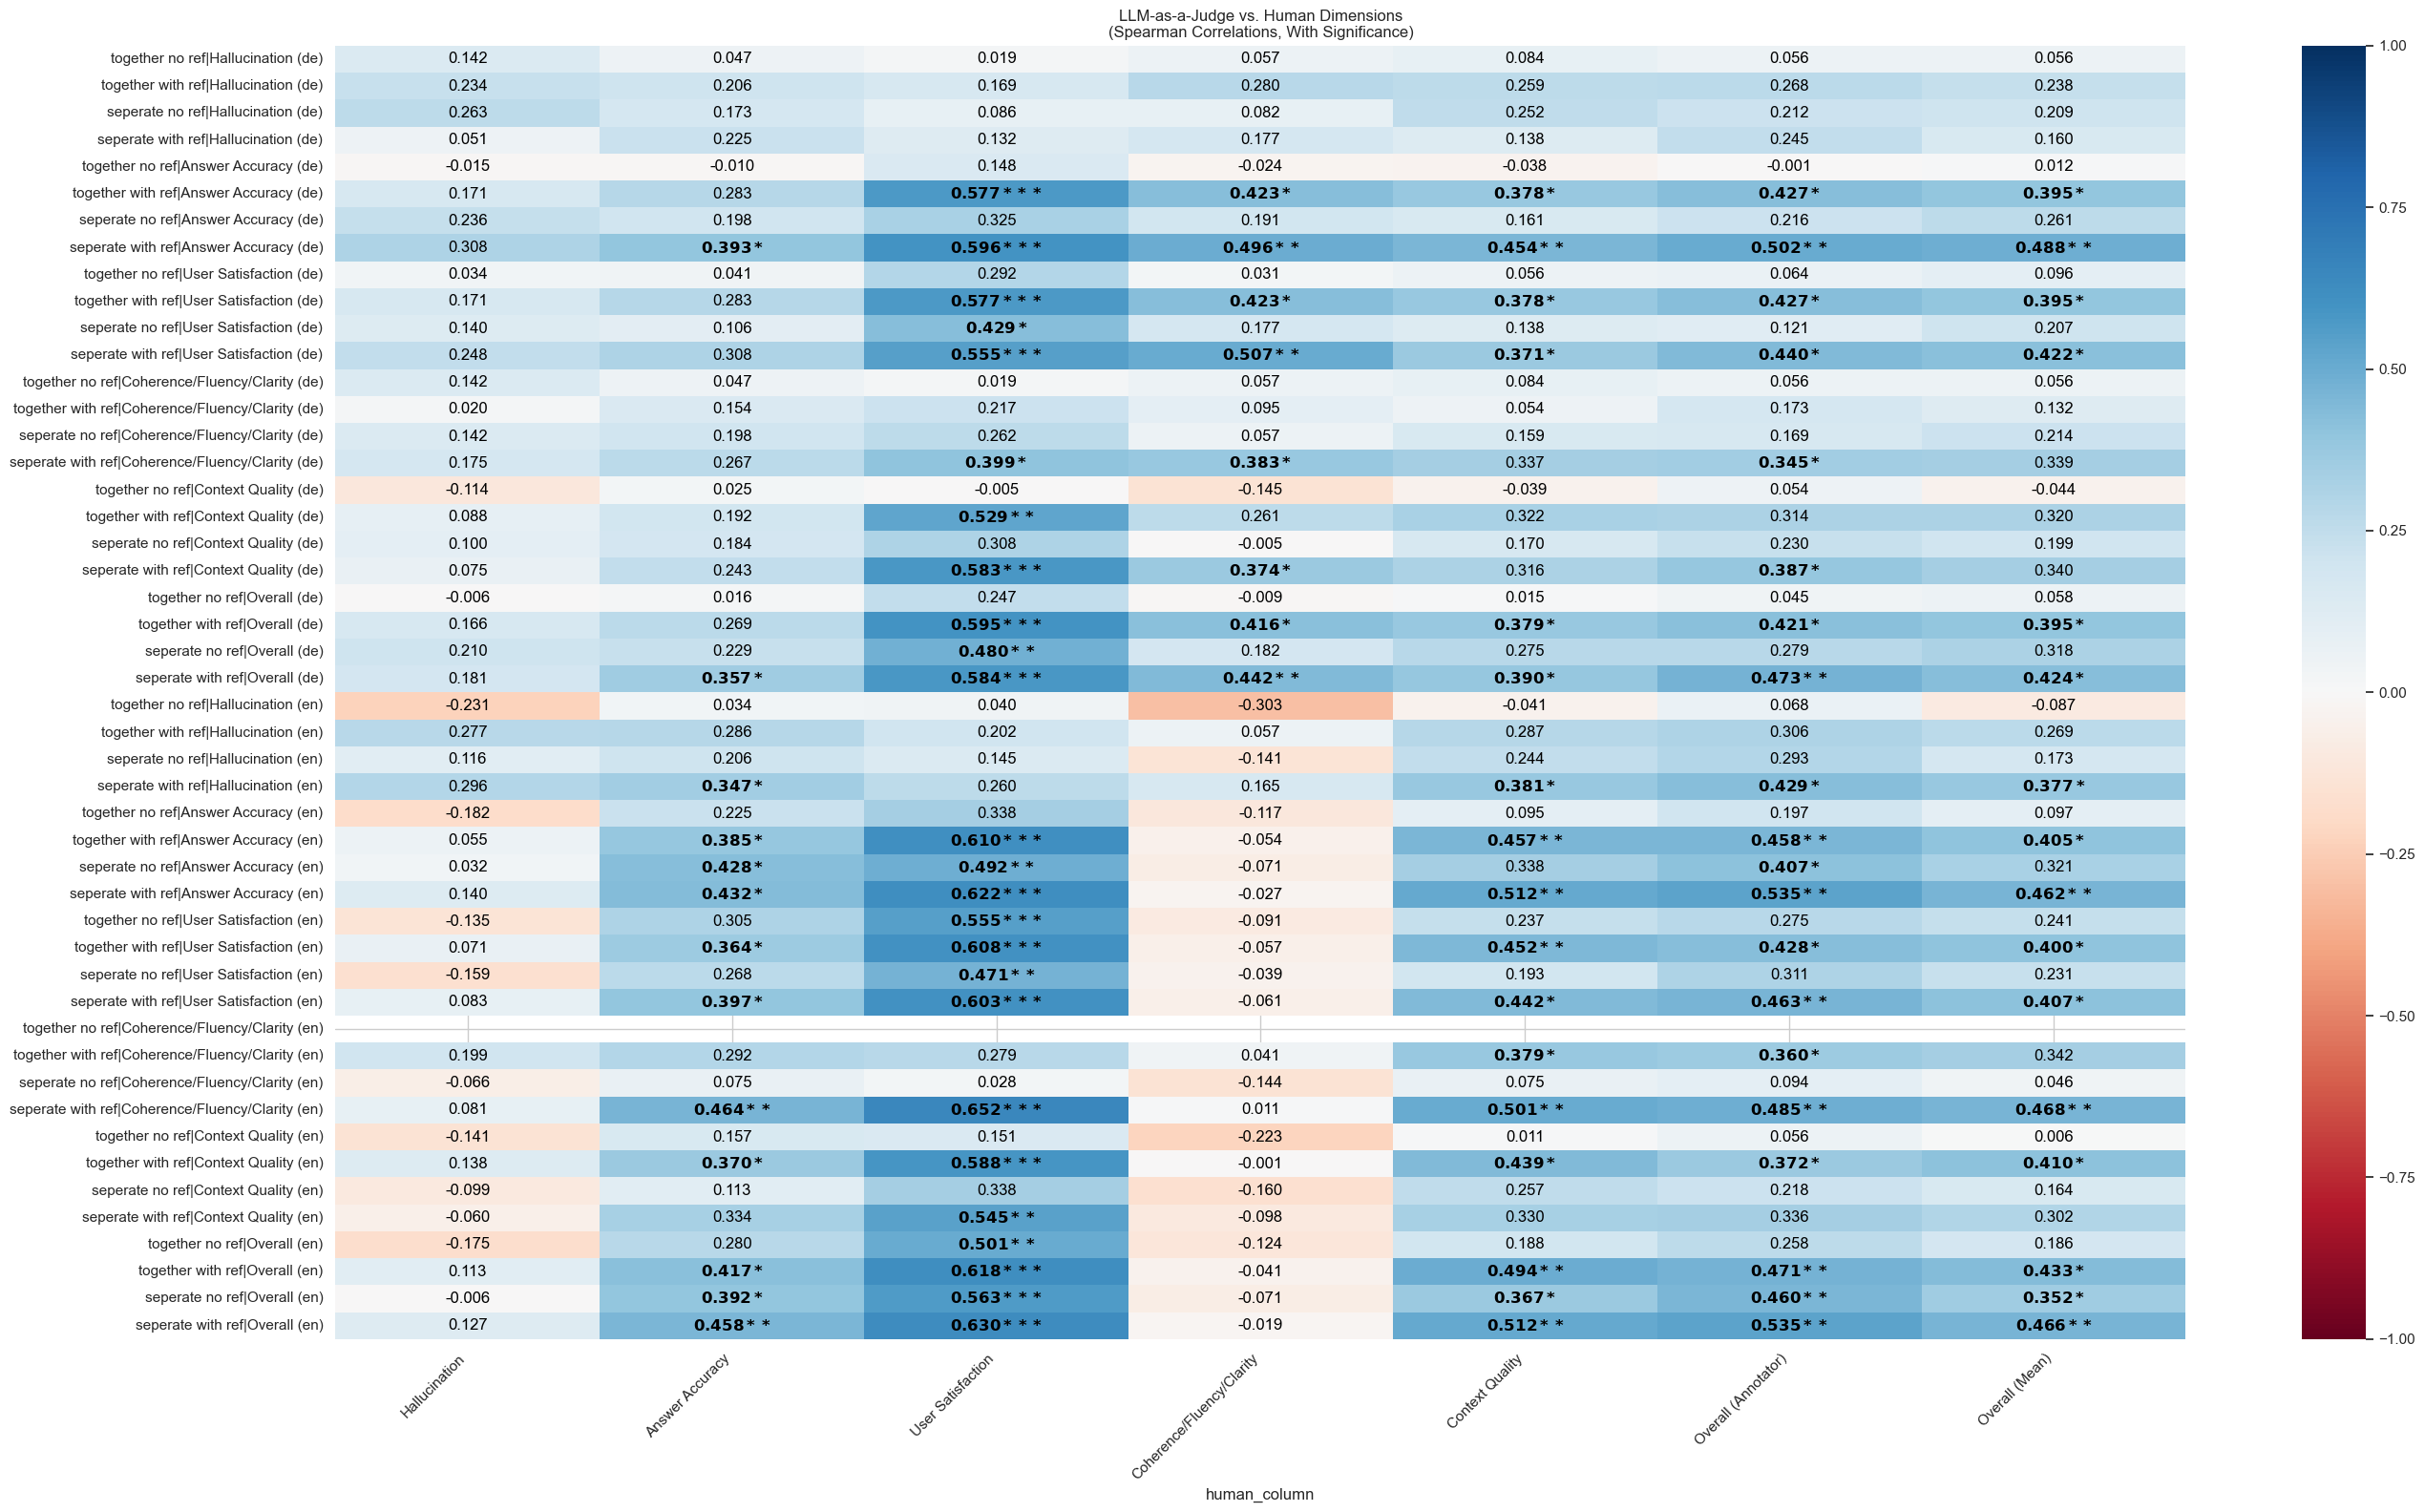

human_column,Hallucination,Answer Accuracy,User Satisfaction,Coherence/Fluency/Clarity,Context Quality,Overall (Annotator),Overall (Mean)
together no ref|Hallucination (de),0.142,0.047,0.019,0.057,0.084,0.056,0.056
together with ref|Hallucination (de),0.234,0.206,0.169,0.280,0.259,0.268,0.238
seperate no ref|Hallucination (de),0.263,0.173,0.086,0.082,0.252,0.212,0.209
seperate with ref|Hallucination (de),0.051,0.225,0.132,0.177,0.138,0.245,0.160
together no ref|Answer Accuracy (de),-0.015,-0.010,0.148,-0.024,-0.038,-0.001,0.012


In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ------------------------------------------------------------------
# 1) READ THE FILTERED CORRELATION CSV
#    This CSV should already contain only rows where
#    (a) LLM-based metrics are matched to the correct human dimension
#    (b) Or other filtering you’ve done (e.g., no lexical metrics).
# ------------------------------------------------------------------
corr_path = "../../../data/eval/correlation/correlation_splits_all.csv"
df_corr = pd.read_csv(corr_path)

# ------------------------------------------------------------------
# 2) FILTER FOR LLM-AS-A-JUDGE FILES (OPTIONAL, IF NOT ALREADY FILTERED)
# ------------------------------------------------------------------
llm_files = [
    "llm_judge_together_no_ref_de.csv",
    "llm_judge_together_no_ref_en.csv",
    "llm_judge_together_with_ref_de.csv",
    "llm_judge_together_with_ref_en.csv",
    "llm_judge_seperate_no_ref_de.csv",
    "llm_judge_seperate_no_ref_en.csv",
    "llm_judge_seperate_with_ref_de.csv",
    "llm_judge_seperate_with_ref_en.csv",
]
df_llm = df_corr[df_corr["metric_file"].isin(llm_files)].copy()

# ------------------------------------------------------------------
# 3) SELECT ONLY RELEVANT HUMAN COLUMNS
#    We include 'overall_mean' here to compare with 'overall_score'
# ------------------------------------------------------------------
key_human_dims = [
    "avg_hallucination",
    "avg_answer_acc",
    "avg_user_sat",
    "avg_coherence",
    "avg_context_qual",
    "avg_overall",
    "overall_mean"  # So we can compare LLM's overall_score to both 'avg_overall' and 'overall_mean'
]
df_llm = df_llm[df_llm["human_column"].isin(key_human_dims)]

# ------------------------------------------------------------------
# 4) PIVOT THE CORRELATION AND P-VALUES
# ------------------------------------------------------------------
pivot_corr = df_llm.pivot_table(
    index=["metric_file", "metric_column", "language"], 
    columns="human_column",
    values="spearman_corr"
)

pivot_pval = df_llm.pivot_table(
    index=["metric_file", "metric_column", "language"], 
    columns="human_column",
    values="p_value"
)

# ------------------------------------------------------------------
# 5) DEFINE A FUNCTION TO FORMAT SIGNIFICANCE IN THE HEATMAP
# ------------------------------------------------------------------
def significance_marker_and_bold(r_val, p_val):
    """
    Returns a LaTeX-style string with bolding for p < 0.05 
    and appended stars based on p-value thresholds.
    """
    if p_val < 0.001:
        stars = "***"
    elif p_val < 0.01:
        stars = "**"
    elif p_val < 0.05:
        stars = "*"
    else:
        stars = ""
    base_str = f"{r_val:.3f}{stars}"
    if p_val < 0.05:
        # Bold text for significance
        return f"$\\bf{{{base_str}}}$"
    else:
        return base_str

# ------------------------------------------------------------------
# 6) CREATE A HUMAN-READABLE ANNOTATION DATAFRAME
# ------------------------------------------------------------------
annot_df = pivot_corr.copy()

for idx in pivot_corr.index:
    for col in pivot_corr.columns:
        r_val = pivot_corr.loc[idx, col]
        p_val = pivot_pval.loc[idx, col]
        # Handle potential NaNs
        if pd.isna(r_val) or pd.isna(p_val):
            annot_df.loc[idx, col] = ""
        else:
            annot_df.loc[idx, col] = significance_marker_and_bold(r_val, p_val)

# ------------------------------------------------------------------
# 7) RENAME HUMAN COLUMNS FOR PLOTTING
# ------------------------------------------------------------------
col_renames = {
    "avg_hallucination": "Hallucination",
    "avg_answer_acc": "Answer Accuracy",
    "avg_user_sat": "User Satisfaction",
    "avg_coherence": "Coherence/Fluency/Clarity",
    "avg_context_qual": "Context Quality",
    "avg_overall": "Overall (Annotator)",
    "overall_mean": "Overall (Mean)"
}
pivot_corr.rename(columns=col_renames, inplace=True)
annot_df.rename(columns=col_renames, inplace=True)

# ------------------------------------------------------------------
# 8) RENAME THE ROW INDEX FOR PROMPT TYPE + METRIC COLUMN + LANGUAGE
# ------------------------------------------------------------------
new_index_labels = []
for (metric_file, metric_col, lang) in pivot_corr.index:
    # Derive a short label from the filename
    prompt_type = metric_file.replace("llm_judge_", "").replace(".csv", "").replace("_en", "").replace("_de", "").replace("_", " ")
    # e.g. "together_no_ref_de", "seperate_with_ref_en", etc.

    # Map LLM dimension columns to user-friendly names
    llm_dim_map = {
        "hallucination_score": "Hallucination",
        "answer_accuracy_score": "Answer Accuracy",
        "user_satisfaction_score": "User Satisfaction",
        "coherence_clarity_fluency_score": "Coherence/Fluency/Clarity",
        "context_quality_score": "Context Quality",
        "overall_score": "Overall"
    }
    dim_label = llm_dim_map.get(metric_col, metric_col)

    new_label = f"{prompt_type}|{dim_label} ({lang})"
    new_index_labels.append(new_label)
print(new_index_labels)
pivot_corr.index = new_index_labels
annot_df.index   = new_index_labels

# ------------------------------------------------------------------
# 9) DEFINE THE DESIRED COLUMN AND ROW ORDER
# ------------------------------------------------------------------
col_order = [
    "Hallucination",
    "Answer Accuracy",
    "User Satisfaction",
    "Coherence/Fluency/Clarity",
    "Context Quality",
    "Overall (Annotator)",
    "Overall (Mean)"
]
pivot_corr = pivot_corr.reindex(columns=col_order)
annot_df = annot_df.reindex(columns=col_order)

desired_order = [
    "together no ref|Hallucination (de)",
    "together with ref|Hallucination (de)",
    "seperate no ref|Hallucination (de)",
    "seperate with ref|Hallucination (de)",
    "together no ref|Answer Accuracy (de)",
    "together with ref|Answer Accuracy (de)",
    "seperate no ref|Answer Accuracy (de)",
    "seperate with ref|Answer Accuracy (de)",
    "together no ref|User Satisfaction (de)",
    "together with ref|User Satisfaction (de)",
    "seperate no ref|User Satisfaction (de)",
    "seperate with ref|User Satisfaction (de)",
    "together no ref|Coherence/Fluency/Clarity (de)",
    "together with ref|Coherence/Fluency/Clarity (de)",
    "seperate no ref|Coherence/Fluency/Clarity (de)",
    "seperate with ref|Coherence/Fluency/Clarity (de)",
    "together no ref|Context Quality (de)",
    "together with ref|Context Quality (de)",
    "seperate no ref|Context Quality (de)",
    "seperate with ref|Context Quality (de)",
    "together no ref|Overall (de)",
    "together with ref|Overall (de)",
    "seperate no ref|Overall (de)",
    "seperate with ref|Overall (de)",
    "together no ref|Hallucination (en)",
    "together with ref|Hallucination (en)",
    "seperate no ref|Hallucination (en)",
    "seperate with ref|Hallucination (en)",
    "together no ref|Answer Accuracy (en)",
    "together with ref|Answer Accuracy (en)",
    "seperate no ref|Answer Accuracy (en)",
    "seperate with ref|Answer Accuracy (en)",
    "together no ref|User Satisfaction (en)",
    "together with ref|User Satisfaction (en)",
    "seperate no ref|User Satisfaction (en)",
    "seperate with ref|User Satisfaction (en)",
    "together no ref|Coherence/Fluency/Clarity (en)",
    "together with ref|Coherence/Fluency/Clarity (en)",
    "seperate no ref|Coherence/Fluency/Clarity (en)",
    "seperate with ref|Coherence/Fluency/Clarity (en)",
    "together no ref|Context Quality (en)",
    "together with ref|Context Quality (en)",
    "seperate no ref|Context Quality (en)",
    "seperate with ref|Context Quality (en)",
    "together no ref|Overall (en)",
    "together with ref|Overall (en)",
    "seperate no ref|Overall (en)",
    "seperate with ref|Overall (en)",
]
pivot_corr = pivot_corr.reindex(index=desired_order)
annot_df    = annot_df.reindex(index=desired_order)

# ------------------------------------------------------------------
# 10) PLOT THE HEATMAP
# ------------------------------------------------------------------
sns.set_theme(style="whitegrid")
plt.figure(figsize=(28, 16))

# Convert pivot_corr to float for heatmap
corr_matrix = pivot_corr.astype(float)

ax = sns.heatmap(
    data=corr_matrix, 
    annot=annot_df,
    fmt="",
    cmap="RdBu",
    center=0,
    vmin=-1, vmax=1,
    #linewidths=0.5,
    linecolor="gray",
    annot_kws={"color": "black"}
)

ax.set_title("LLM-as-a-Judge vs. Human Dimensions\n(Spearman Correlations, With Significance)")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()

# Optionally save the figure
plt.savefig("../../../data/figures/llm_judge/llm_judge_heatmap_all_1.png", dpi=150)
plt.show()

# If desired, display the annotated dataframe
annot_df.head()


C:\Users\wurch\AppData\Local\Temp\ipykernel_47472\2755336340.py:95: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.198' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annot_df.loc[idx, col] = significance_marker_and_bold(r_val, p_val)
C:\Users\wurch\AppData\Local\Temp\ipykernel_47472\2755336340.py:95: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.191' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annot_df.loc[idx, col] = significance_marker_and_bold(r_val, p_val)
C:\Users\wurch\AppData\Local\Temp\ipykernel_47472\2755336340.py:95: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.161' has dtype incompatible with float64, please explicitly cast to a compa

['seperate no ref|Answer Accuracy (de)', 'seperate no ref|Coherence/Fluency/Clarity (de)', 'seperate no ref|Context Quality (de)', 'seperate no ref|Hallucination (de)', 'seperate no ref|Overall (de)', 'seperate no ref|User Satisfaction (de)', 'seperate no ref|Answer Accuracy (en)', 'seperate no ref|Coherence/Fluency/Clarity (en)', 'seperate no ref|Context Quality (en)', 'seperate no ref|Hallucination (en)', 'seperate no ref|Overall (en)', 'seperate no ref|User Satisfaction (en)', 'seperate with ref|Answer Accuracy (de)', 'seperate with ref|Coherence/Fluency/Clarity (de)', 'seperate with ref|Context Quality (de)', 'seperate with ref|Hallucination (de)', 'seperate with ref|Overall (de)', 'seperate with ref|User Satisfaction (de)', 'seperate with ref|Answer Accuracy (en)', 'seperate with ref|Coherence/Fluency/Clarity (en)', 'seperate with ref|Context Quality (en)', 'seperate with ref|Hallucination (en)', 'seperate with ref|Overall (en)', 'seperate with ref|User Satisfaction (en)', 'togeth

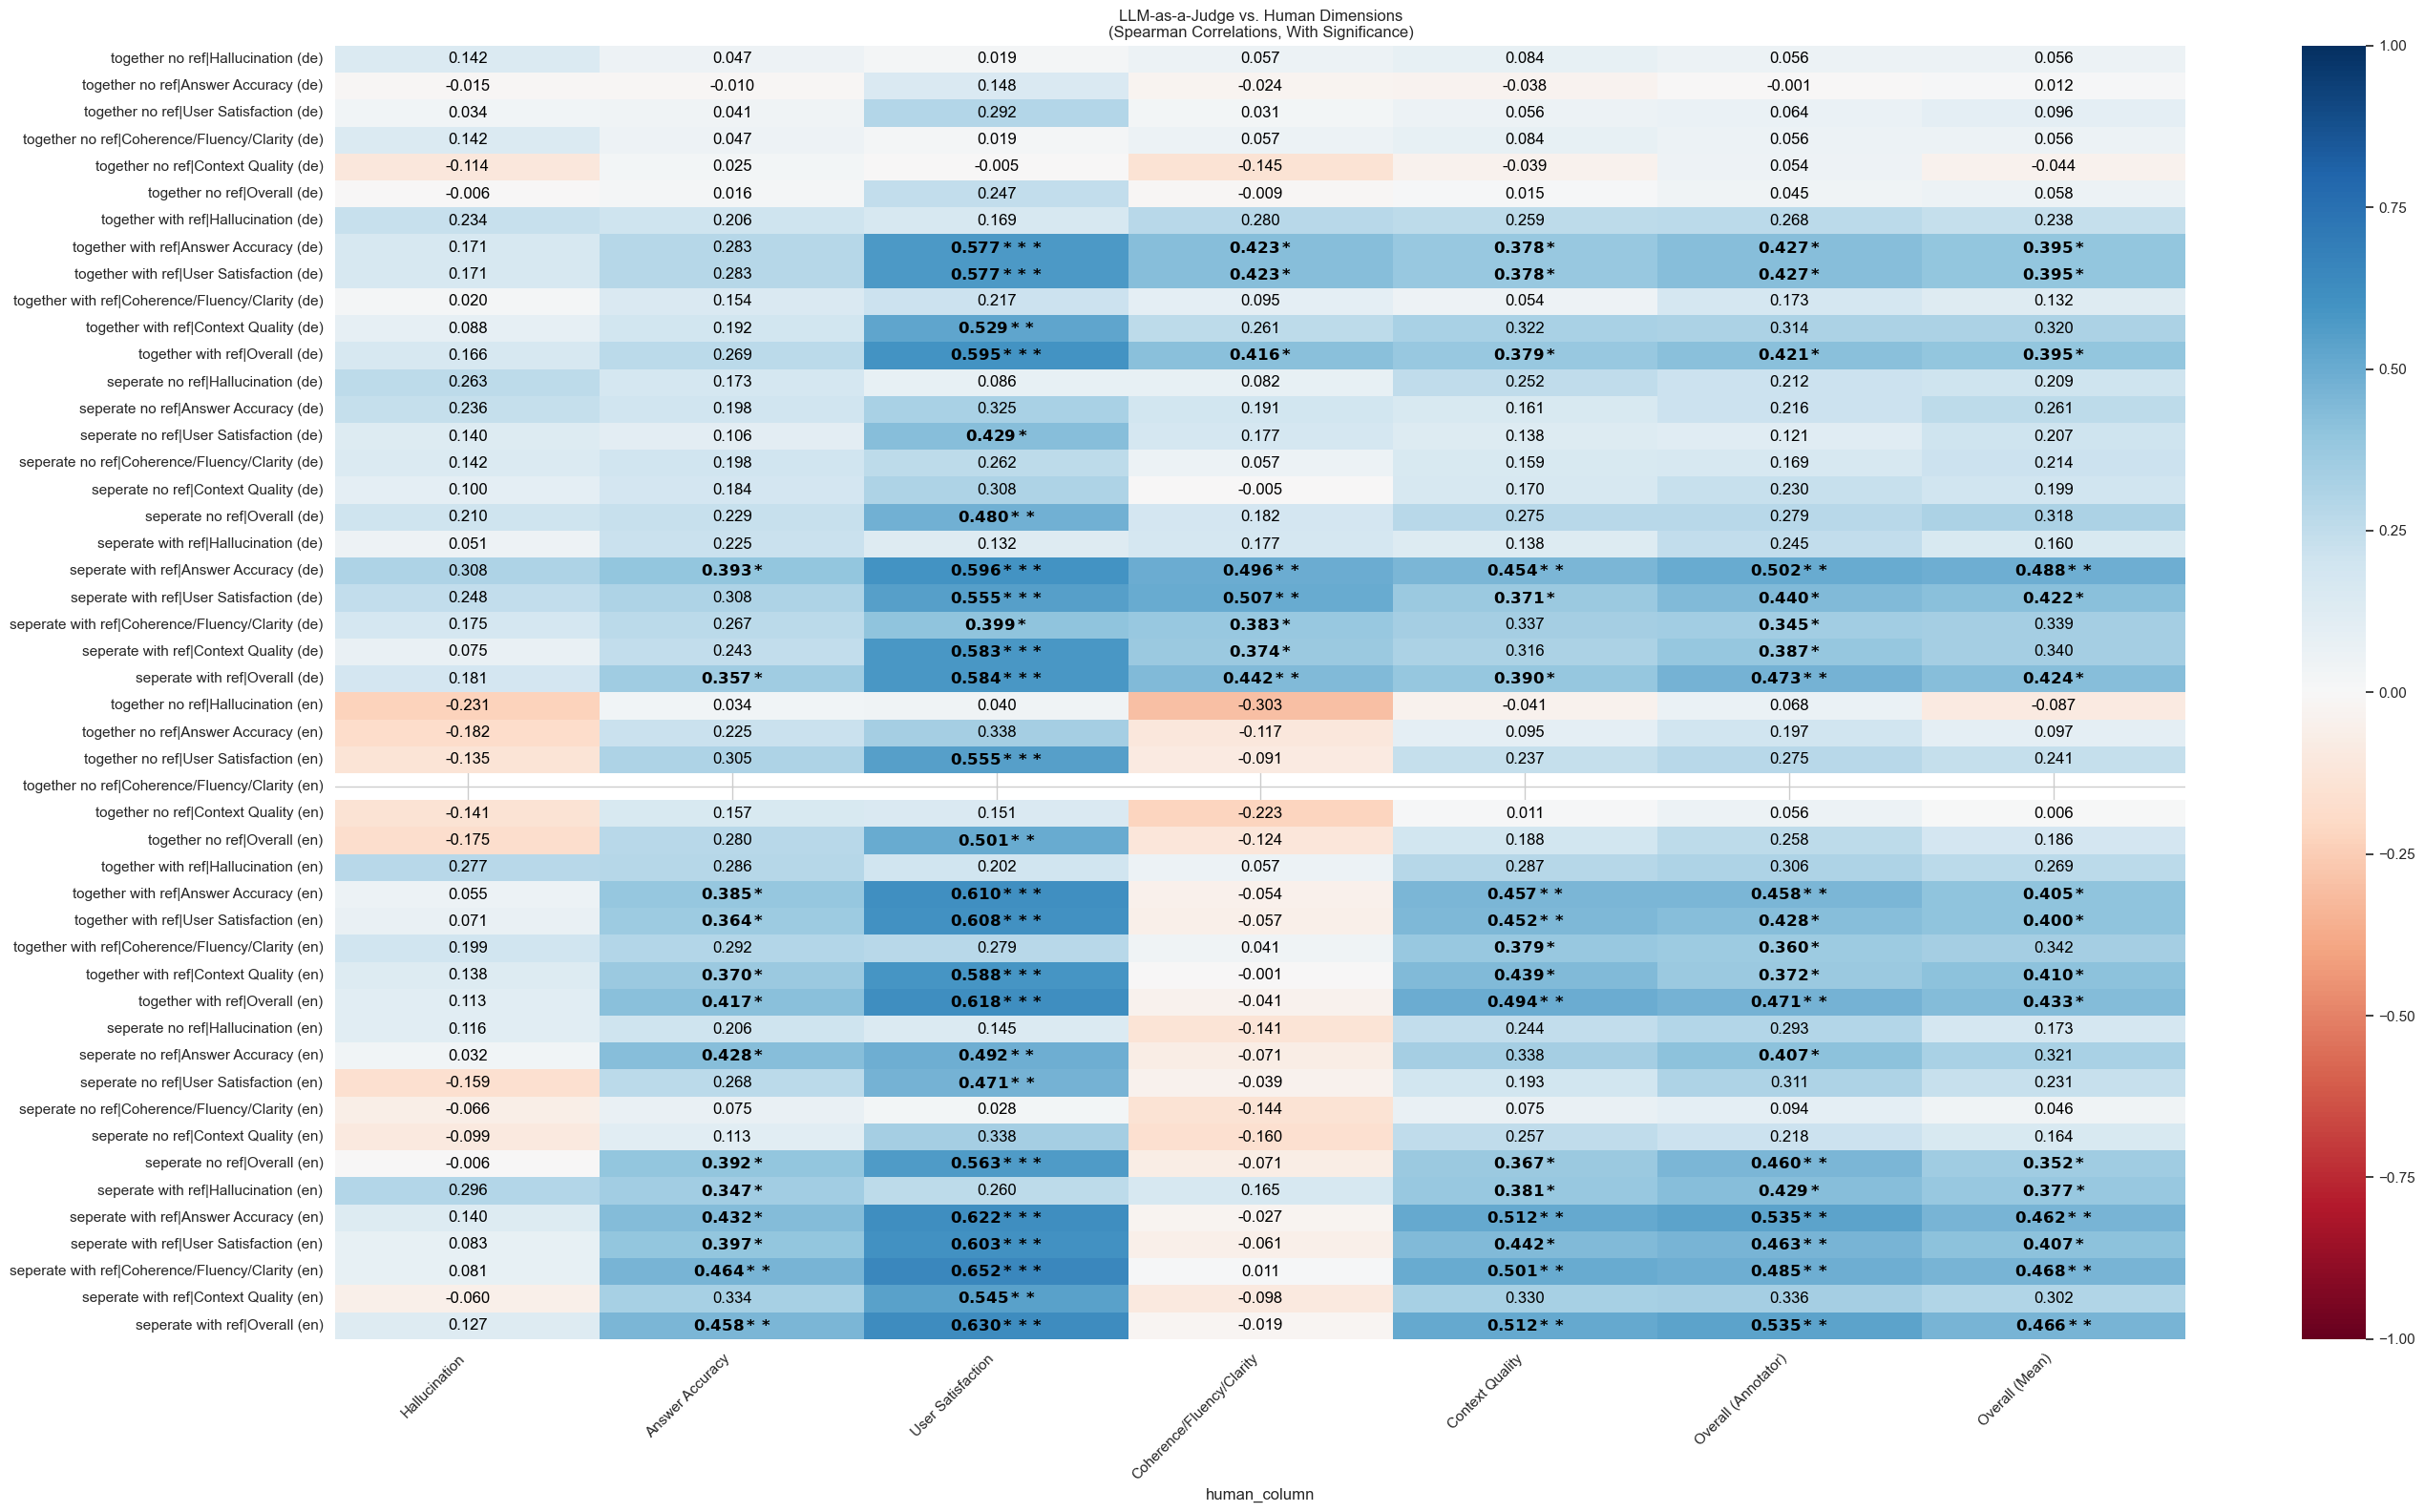

human_column,Hallucination,Answer Accuracy,User Satisfaction,Coherence/Fluency/Clarity,Context Quality,Overall (Annotator),Overall (Mean)
together no ref|Hallucination (de),0.142,0.047,0.019,0.057,0.084,0.056,0.056
together no ref|Answer Accuracy (de),-0.015,-0.010,0.148,-0.024,-0.038,-0.001,0.012
together no ref|User Satisfaction (de),0.034,0.041,0.292,0.031,0.056,0.064,0.096
together no ref|Coherence/Fluency/Clarity (de),0.142,0.047,0.019,0.057,0.084,0.056,0.056
together no ref|Context Quality (de),-0.114,0.025,-0.005,-0.145,-0.039,0.054,-0.044


In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ------------------------------------------------------------------
# 1) READ THE FILTERED CORRELATION CSV
#    This CSV should already contain only rows where
#    (a) LLM-based metrics are matched to the correct human dimension
#    (b) Or other filtering you’ve done (e.g., no lexical metrics).
# ------------------------------------------------------------------
corr_path = "../../../data/eval/correlation/correlation_splits_all.csv"
df_corr = pd.read_csv(corr_path)

# ------------------------------------------------------------------
# 2) FILTER FOR LLM-AS-A-JUDGE FILES (OPTIONAL, IF NOT ALREADY FILTERED)
# ------------------------------------------------------------------
llm_files = [
    "llm_judge_together_no_ref_de.csv",
    "llm_judge_together_no_ref_en.csv",
    "llm_judge_together_with_ref_de.csv",
    "llm_judge_together_with_ref_en.csv",
    "llm_judge_seperate_no_ref_de.csv",
    "llm_judge_seperate_no_ref_en.csv",
    "llm_judge_seperate_with_ref_de.csv",
    "llm_judge_seperate_with_ref_en.csv",
]
df_llm = df_corr[df_corr["metric_file"].isin(llm_files)].copy()

# ------------------------------------------------------------------
# 3) SELECT ONLY RELEVANT HUMAN COLUMNS
#    We include 'overall_mean' here to compare with 'overall_score'
# ------------------------------------------------------------------
key_human_dims = [
    "avg_hallucination",
    "avg_answer_acc",
    "avg_user_sat",
    "avg_coherence",
    "avg_context_qual",
    "avg_overall",
    "overall_mean"  # So we can compare LLM's overall_score to both 'avg_overall' and 'overall_mean'
]
df_llm = df_llm[df_llm["human_column"].isin(key_human_dims)]

# ------------------------------------------------------------------
# 4) PIVOT THE CORRELATION AND P-VALUES
# ------------------------------------------------------------------
pivot_corr = df_llm.pivot_table(
    index=["metric_file", "metric_column", "language"], 
    columns="human_column",
    values="spearman_corr"
)

pivot_pval = df_llm.pivot_table(
    index=["metric_file", "metric_column", "language"], 
    columns="human_column",
    values="p_value"
)

# ------------------------------------------------------------------
# 5) DEFINE A FUNCTION TO FORMAT SIGNIFICANCE IN THE HEATMAP
# ------------------------------------------------------------------
def significance_marker_and_bold(r_val, p_val):
    """
    Returns a LaTeX-style string with bolding for p < 0.05 
    and appended stars based on p-value thresholds.
    """
    if p_val < 0.001:
        stars = "***"
    elif p_val < 0.01:
        stars = "**"
    elif p_val < 0.05:
        stars = "*"
    else:
        stars = ""
    base_str = f"{r_val:.3f}{stars}"
    if p_val < 0.05:
        # Bold text for significance
        return f"$\\bf{{{base_str}}}$"
    else:
        return base_str

# ------------------------------------------------------------------
# 6) CREATE A HUMAN-READABLE ANNOTATION DATAFRAME
# ------------------------------------------------------------------
annot_df = pivot_corr.copy()

for idx in pivot_corr.index:
    for col in pivot_corr.columns:
        r_val = pivot_corr.loc[idx, col]
        p_val = pivot_pval.loc[idx, col]
        # Handle potential NaNs
        if pd.isna(r_val) or pd.isna(p_val):
            annot_df.loc[idx, col] = ""
        else:
            annot_df.loc[idx, col] = significance_marker_and_bold(r_val, p_val)

# ------------------------------------------------------------------
# 7) RENAME HUMAN COLUMNS FOR PLOTTING
# ------------------------------------------------------------------
col_renames = {
    "avg_hallucination": "Hallucination",
    "avg_answer_acc": "Answer Accuracy",
    "avg_user_sat": "User Satisfaction",
    "avg_coherence": "Coherence/Fluency/Clarity",
    "avg_context_qual": "Context Quality",
    "avg_overall": "Overall (Annotator)",
    "overall_mean": "Overall (Mean)"
}
pivot_corr.rename(columns=col_renames, inplace=True)
annot_df.rename(columns=col_renames, inplace=True)

# ------------------------------------------------------------------
# 8) RENAME THE ROW INDEX FOR PROMPT TYPE + METRIC COLUMN + LANGUAGE
# ------------------------------------------------------------------
new_index_labels = []
for (metric_file, metric_col, lang) in pivot_corr.index:
    # Derive a short label from the filename
    prompt_type = metric_file.replace("llm_judge_", "").replace(".csv", "").replace("_en", "").replace("_de", "").replace("_", " ")
    # e.g. "together_no_ref_de", "seperate_with_ref_en", etc.

    # Map LLM dimension columns to user-friendly names
    llm_dim_map = {
        "hallucination_score": "Hallucination",
        "answer_accuracy_score": "Answer Accuracy",
        "user_satisfaction_score": "User Satisfaction",
        "coherence_clarity_fluency_score": "Coherence/Fluency/Clarity",
        "context_quality_score": "Context Quality",
        "overall_score": "Overall"
    }
    dim_label = llm_dim_map.get(metric_col, metric_col)

    new_label = f"{prompt_type}|{dim_label} ({lang})"
    new_index_labels.append(new_label)
print(new_index_labels)
pivot_corr.index = new_index_labels
annot_df.index   = new_index_labels

# ------------------------------------------------------------------
# 9) DEFINE THE DESIRED COLUMN AND ROW ORDER
# ------------------------------------------------------------------
col_order = [
    "Hallucination",
    "Answer Accuracy",
    "User Satisfaction",
    "Coherence/Fluency/Clarity",
    "Context Quality",
    "Overall (Annotator)",
    "Overall (Mean)"
]
pivot_corr = pivot_corr.reindex(columns=col_order)
annot_df = annot_df.reindex(columns=col_order)

desired_order = ['together no ref|Hallucination (de)', 
                'together no ref|Answer Accuracy (de)', 
                'together no ref|User Satisfaction (de)', 
                'together no ref|Coherence/Fluency/Clarity (de)', 
                'together no ref|Context Quality (de)', 
                'together no ref|Overall (de)', 
                'together with ref|Hallucination (de)', 
                'together with ref|Answer Accuracy (de)', 
                'together with ref|User Satisfaction (de)', 
                'together with ref|Coherence/Fluency/Clarity (de)', 
                'together with ref|Context Quality (de)', 
                'together with ref|Overall (de)', 
                'seperate no ref|Hallucination (de)', 
                'seperate no ref|Answer Accuracy (de)', 
                'seperate no ref|User Satisfaction (de)', 
                'seperate no ref|Coherence/Fluency/Clarity (de)', 
                'seperate no ref|Context Quality (de)', 
                'seperate no ref|Overall (de)', 
                'seperate with ref|Hallucination (de)', 
                'seperate with ref|Answer Accuracy (de)', 
                'seperate with ref|User Satisfaction (de)', 
                'seperate with ref|Coherence/Fluency/Clarity (de)', 
                'seperate with ref|Context Quality (de)', 
                'seperate with ref|Overall (de)', 
                'together no ref|Hallucination (en)', 
                'together no ref|Answer Accuracy (en)', 
                'together no ref|User Satisfaction (en)', 
                'together no ref|Coherence/Fluency/Clarity (en)', 
                'together no ref|Context Quality (en)', 
                'together no ref|Overall (en)', 
                'together with ref|Hallucination (en)', 
                'together with ref|Answer Accuracy (en)', 
                'together with ref|User Satisfaction (en)', 
                'together with ref|Coherence/Fluency/Clarity (en)', 
                'together with ref|Context Quality (en)', 
                'together with ref|Overall (en)', 
                'seperate no ref|Hallucination (en)', 
                'seperate no ref|Answer Accuracy (en)', 
                'seperate no ref|User Satisfaction (en)', 
                'seperate no ref|Coherence/Fluency/Clarity (en)', 
                'seperate no ref|Context Quality (en)', 
                'seperate no ref|Overall (en)', 
                'seperate with ref|Hallucination (en)', 
                'seperate with ref|Answer Accuracy (en)', 
                'seperate with ref|User Satisfaction (en)', 
                'seperate with ref|Coherence/Fluency/Clarity (en)', 
                'seperate with ref|Context Quality (en)', 
                'seperate with ref|Overall (en)']
pivot_corr = pivot_corr.reindex(index=desired_order)
annot_df    = annot_df.reindex(index=desired_order)

# ------------------------------------------------------------------
# 10) PLOT THE HEATMAP
# ------------------------------------------------------------------
sns.set_theme(style="whitegrid")
plt.figure(figsize=(28, 16))

# Convert pivot_corr to float for heatmap
corr_matrix = pivot_corr.astype(float)

ax = sns.heatmap(
    data=corr_matrix, 
    annot=annot_df,
    fmt="",
    cmap="RdBu",
    center=0,
    vmin=-1, vmax=1,
    #linewidths=0.5,
    linecolor="gray",
    annot_kws={"color": "black"}
)

ax.set_title("LLM-as-a-Judge vs. Human Dimensions\n(Spearman Correlations, With Significance)")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()

# Optionally save the figure
plt.savefig("../../../data/figures/llm_judge/llm_judge_heatmap_all_2.png", dpi=150)
plt.show()

# If desired, display the annotated dataframe
annot_df.head()


In [9]:
import pandas as pd

# Path to your correlation file from the previous steps
corr_path = "../../../data/eval/correlation/correlation_splits_filtered_llm.csv"
df_corr = pd.read_csv(corr_path)



# 2) Filter for these files only
df_lex = df_corr[df_corr["metric_file"].isin(llm_files)].copy()

# 3) Optionally, limit to certain human columns of interest
#    For example, if you're particularly interested in 'avg_answer_acc' or 'avg_hallucination'.
key_human_dims = ["avg_hallucination", "avg_answer_acc", "avg_user_sat", "avg_coherence", "avg_context_qual", "avg_overall", "overall_mean"]
df_lex = df_lex[df_lex["human_column"].isin(key_human_dims)]

# show all rows
pd.set_option('display.max_rows', None)
# 4) Print or inspect
print("Filtered lexical correlations against selected human dimensions:")
df_lex[[
    "metric_file", "metric_column", "human_column", 
    "language", "spearman_corr", "p_value"
]].sort_values("spearman_corr", ascending=False)


Filtered lexical correlations against selected human dimensions:


,metric_file,metric_column,human_column,language,spearman_corr,p_value
23,llm_judge_together_with_ref_en.csv,user_satisfaction_score,avg_user_sat,en,0.607981,0.000175
51,llm_judge_seperate_with_ref_en.csv,user_satisfaction_score,avg_user_sat,en,0.603400,0.000201
16,llm_judge_together_with_ref_de.csv,user_satisfaction_score,avg_user_sat,de,0.577337,0.000435
44,llm_judge_seperate_with_ref_de.csv,user_satisfaction_score,avg_user_sat,de,0.554650,0.000809
9,llm_judge_together_no_ref_en.csv,user_satisfaction_score,avg_user_sat,en,0.554580,0.000811
54,llm_judge_seperate_with_ref_en.csv,overall_score,avg_overall,en,0.534573,0.001352
47,llm_judge_seperate_with_ref_de.csv,overall_score,avg_overall,de,0.472586,0.005484
26,llm_judge_together_with_ref_en.csv,overall_score,avg_overall,en,0.471025,0.005662
37,llm_judge_seperate_no_ref_en.csv,user_satisfaction_score,avg_user_sat,en,0.470702,0.005700
55,llm_judge_seperate_with_ref_en.csv,overall_score,overall_mean,en,0.465835,0.006292


In [10]:
# Pivot: index = (metric_file, metric_column, language),
#         columns = human_column,
#         values = spearman_corr
corr_pivot = df_lex.pivot_table(
    index=["metric_file", "metric_column", "language"],
    columns="human_column",
    values="spearman_corr"
).reset_index()

print("\nPivoted table of Spearman correlations (lexical metrics vs. human columns):")
corr_pivot = corr_pivot.drop(columns=["metric_file"])
corr_pivot



Pivoted table of Spearman correlations (lexical metrics vs. human columns):


human_column,metric_column,language,avg_answer_acc,avg_coherence,avg_context_qual,avg_hallucination,avg_overall,avg_user_sat,overall_mean
0,answer_accuracy_score,de,0.198340,NaN,NaN,NaN,NaN,NaN,NaN
1,coherence_clarity_fluency_score,de,NaN,0.057278,NaN,NaN,NaN,NaN,NaN
2,context_quality_score,de,NaN,NaN,0.170227,NaN,NaN,NaN,NaN
3,hallucination_score,de,NaN,NaN,NaN,0.262906,NaN,NaN,NaN
4,overall_score,de,NaN,NaN,NaN,NaN,0.279328,NaN,0.318269
5,user_satisfaction_score,de,NaN,NaN,NaN,NaN,NaN,0.428848,NaN
6,answer_accuracy_score,en,0.428377,NaN,NaN,NaN,NaN,NaN,NaN
7,coherence_clarity_fluency_score,en,NaN,-0.143640,NaN,NaN,NaN,NaN,NaN
8,context_quality_score,en,NaN,NaN,0.257273,NaN,NaN,NaN,NaN
9,hallucination_score,en,NaN,NaN,NaN,0.116011,NaN,NaN,NaN
